In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [47]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import text

In [48]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:////Users/lalagilbert/Workspace/sqlalchemy_challenge/Resources/hawaii.sqlite')
conn = engine.connect()

In [49]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [50]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [51]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [52]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [53]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

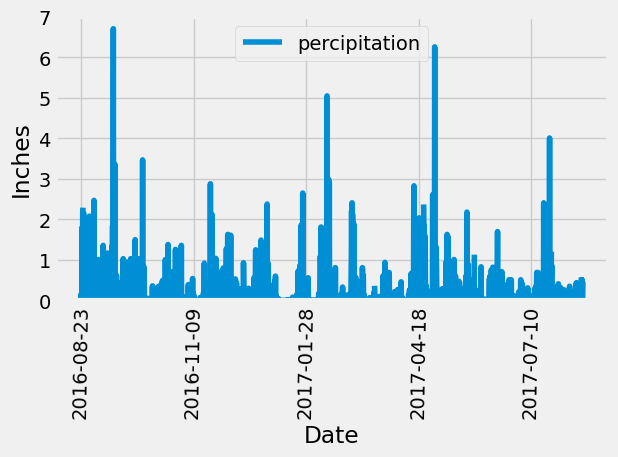

In [89]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = session.query(func.max(measurement.date) - text("'365 days'")).scalar()

# Perform a query to retrieve the data and precipitation scores
data = values = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-22').\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
query_df = pd.DataFrame(data, columns=['date', 'percipitation'])
query_df.set_index(query_df['date'], inplace=True)

# Sort the dataframe by date
query_df = query_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
query_df.plot()
plt.ylim(0,7)
plt.xticks(rotation=89)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [75]:
# Use Pandas to calculate the summary statistics for the precipitation data
query_df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [78]:
# Design a query to calculate the total number of stations in the dataset
total_stations= session.query(station.station).count()
total_stations

9

In [86]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Find the most active station ID
most_active_stations = session.query(measurement.station,func.count(measurement.station)).order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station).all() 

print(most_active_stations) 


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [94]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stations_id = most_active_stations[0][0]
print(most_active_stations_id)

# Query to calculate the lowest temperature
lowest_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == most_active_stations_id).\
    scalar()
print(lowest_temp)

# Query to calculate the highest temperature
highest_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == most_active_stations_id).\
    scalar()
print(highest_temp)

# Query to calculate the average temperature
avg_temp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == most_active_stations_id).\
    scalar()
print(avg_temp)

USC00519281
54.0
85.0
71.66378066378067


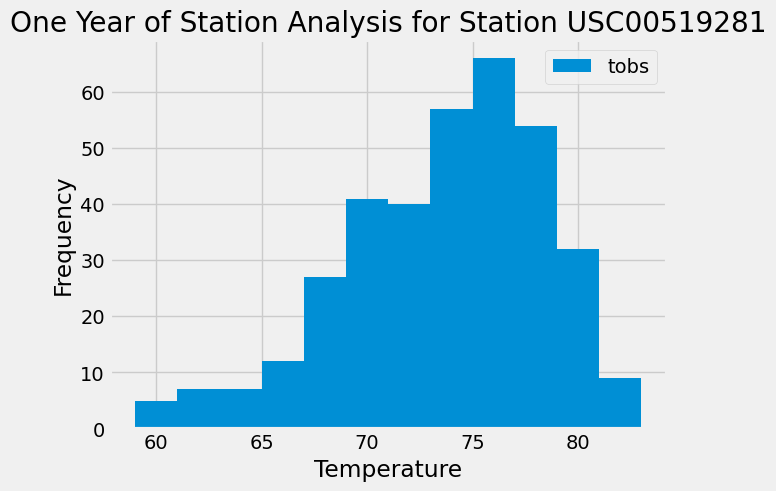

In [97]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year = session.query(measurement.date, measurement.tobs).filter(measurement.station == most_active_stations_id).\
    filter(measurement.date > '2016-08-17').all()

#Save results into a dataframe
last_yr_df = pd.DataFrame(last_year, columns=['date', 'tobs'])

# Plot the results as a histogram with bins=12
last_yr_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title(f"One Year of Station Analysis for Station {most_active_stations_id}")
plt.legend(["tobs"])
plt.show()

# Close Session

In [98]:
# Close Session
session.close()